In [ ]:
import optuna
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from maxsat import MaxSAT
from IBGA import IBGA

# 📌 Load your MAXSAT instance
maxsat_instance = MaxSAT()
maxsat_instance.load_wcnf(r"C:\Users\loren\Documents\maxsat\Data\la04-567-0696.wcnf")  # ✅ Replace with your actual instance
maxsat_instance.display_info()

# ✅ Define the Optuna objective function
def objective(trial):
    population_size = trial.suggest_int('population_size', 20, 80)
    crossover_prob = trial.suggest_float('crossover_prob', 0.5, 0.9)
    mutation_prob = trial.suggest_float('mutation_prob', 0.01, 0.3)
    use_lagrangian = trial.suggest_categorical('use_lagrangian', [True, False])

    # Initialize population heuristically
    initial_population = maxsat_instance.initialize_population_heuristic(population_size)

    # Run IBGA
    ibga = IBGA(maxsat_instance)
    best_individual = ibga.run_bga(
        initial_population=initial_population,
        max_generations=50,
        crossover_prob=crossover_prob,
        mutation_prob=mutation_prob,
        elite_size=2,
        time_budget=10,
        use_lagrangian=use_lagrangian
    )

    # ✅ Compute fitness and runtime approximation
    nsat = maxsat_instance.compute_fitness(best_individual)
    t = population_size * 50  # 50 = max_generations

    # ✅ Save Exercise 3 format as user attributes
    trial.set_user_attr("t", t)
    trial.set_user_attr("nsat", nsat)
    trial.set_user_attr("xbest", best_individual)

    # ✅ Return fitness for Optuna to maximize
    return nsat

# 📌 Run Optuna — maximize satisfied clauses
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# 📌 Export full results for backup
results_df = study.trials_dataframe()
results_df.to_csv("optuna_eda104_lagrangian_results.csv", index=False)

# ✅ Exercise 3 Output: Best Run
best_trial = study.best_trial
print(f"{best_trial.user_attrs['t']}\t{best_trial.user_attrs['nsat']}\t{best_trial.user_attrs['xbest']}")



# ✅ Optional: Boxplot comparing Lagrangian vs Classic
plt.figure(figsize=(10, 6))
sns.boxplot(x='params_use_lagrangian', y='value', data=results_df)
plt.title('Fitness Distribution: Lagrangian vs Classic Stochastic Ranking')
plt.xlabel('Lagrangian Ranking Used')
plt.ylabel('Satisfied Clauses (Fitness)')
plt.grid(True)
plt.show()


[I 2025-03-19 17:20:52,290] A new study created in memory with name: no-name-9081aedd-d7ff-4b58-bcfb-80dd3a3a0b07


📌 MaxSAT Instance Loaded
   - Variables: 35772
   - Clauses: 359683
   - Sample Clauses:
     Clause 1: [-568]
     Clause 2: [-569]
     Clause 3: [-570]
     Clause 4: [-571]
     Clause 5: [-572]


Evolving Generations:   2%|▏         | 1/50 [00:14<11:37, 14.24s/it]

✅ Generation 0: New best fitness = 312515
⏰ Time budget reached at generation 1



[I 2025-03-19 17:21:14,741] Trial 0 finished with value: 312515.0 and parameters: {'population_size': 22, 'crossover_prob': 0.5284435328866733, 'mutation_prob': 0.23915629792348922, 'use_lagrangian': True}. Best is trial 0 with value: 312515.0.
Evolving Generations:   2%|▏         | 1/50 [00:22<18:05, 22.15s/it]

✅ Generation 0: New best fitness = 312305
⏰ Time budget reached at generation 1



[I 2025-03-19 17:21:49,755] Trial 1 finished with value: 312305.0 and parameters: {'population_size': 34, 'crossover_prob': 0.5194455891474015, 'mutation_prob': 0.2539490008839741, 'use_lagrangian': True}. Best is trial 0 with value: 312515.0.
Evolving Generations:   2%|▏         | 1/50 [00:20<16:47, 20.57s/it]

✅ Generation 0: New best fitness = 312397
⏰ Time budget reached at generation 1



[I 2025-03-19 17:22:22,268] Trial 2 finished with value: 312397.0 and parameters: {'population_size': 32, 'crossover_prob': 0.895363836076007, 'mutation_prob': 0.26112389626024296, 'use_lagrangian': True}. Best is trial 0 with value: 312515.0.
Evolving Generations:   2%|▏         | 1/50 [14:54<12:10:47, 894.85s/it]

✅ Generation 0: New best fitness = 313067
⏰ Time budget reached at generation 1



[I 2025-03-19 17:37:31,014] Trial 3 finished with value: 313067.0 and parameters: {'population_size': 38, 'crossover_prob': 0.8725026480911524, 'mutation_prob': 0.04031798079561371, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [25:48<21:04:12, 1548.01s/it]

✅ Generation 0: New best fitness = 312596
⏰ Time budget reached at generation 1



[I 2025-03-19 18:03:37,231] Trial 4 finished with value: 312596.0 and parameters: {'population_size': 50, 'crossover_prob': 0.5511887864149633, 'mutation_prob': 0.012816591737676018, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [12:40<10:21:27, 760.96s/it]

✅ Generation 0: New best fitness = 312606
⏰ Time budget reached at generation 1



[I 2025-03-19 18:16:31,011] Trial 5 finished with value: 312606.0 and parameters: {'population_size': 35, 'crossover_prob': 0.5583064521102021, 'mutation_prob': 0.07694347721633915, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:42<34:52, 42.70s/it]

✅ Generation 0: New best fitness = 312753
⏰ Time budget reached at generation 1



[I 2025-03-19 18:17:38,608] Trial 6 finished with value: 312753.0 and parameters: {'population_size': 66, 'crossover_prob': 0.7436860481162291, 'mutation_prob': 0.2640913837088846, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [36:29<29:48:26, 2189.93s/it]

✅ Generation 0: New best fitness = 312700
⏰ Time budget reached at generation 1



[I 2025-03-19 18:54:30,343] Trial 7 finished with value: 312700.0 and parameters: {'population_size': 58, 'crossover_prob': 0.8173833051295702, 'mutation_prob': 0.012113802339979506, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [18:22<15:00:22, 1102.50s/it]

✅ Generation 0: New best fitness = 312405
⏰ Time budget reached at generation 1



[I 2025-03-19 19:13:08,892] Trial 8 finished with value: 312405.0 and parameters: {'population_size': 41, 'crossover_prob': 0.8278763921911216, 'mutation_prob': 0.07758317685615587, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:19<16:14, 19.89s/it]

✅ Generation 0: New best fitness = 312757
⏰ Time budget reached at generation 1



[I 2025-03-19 19:13:40,690] Trial 9 finished with value: 312757.0 and parameters: {'population_size': 30, 'crossover_prob': 0.721562094883411, 'mutation_prob': 0.13311878948682263, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [1:09:09<56:28:23, 4149.05s/it]

✅ Generation 0: New best fitness = 312601
⏰ Time budget reached at generation 1



[I 2025-03-19 20:23:20,468] Trial 10 finished with value: 312601.0 and parameters: {'population_size': 80, 'crossover_prob': 0.6449358557625136, 'mutation_prob': 0.17577612003238471, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:12<10:29, 12.85s/it]

✅ Generation 0: New best fitness = 312868
⏰ Time budget reached at generation 1



[I 2025-03-19 20:23:40,858] Trial 11 finished with value: 312868.0 and parameters: {'population_size': 20, 'crossover_prob': 0.69228816439357, 'mutation_prob': 0.13506408048839633, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:13<11:02, 13.52s/it]

✅ Generation 0: New best fitness = 312496
⏰ Time budget reached at generation 1



[I 2025-03-19 20:24:02,370] Trial 12 finished with value: 312496.0 and parameters: {'population_size': 21, 'crossover_prob': 0.6466066928045197, 'mutation_prob': 0.16104957290120267, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [21:04<17:12:34, 1264.38s/it]

✅ Generation 0: New best fitness = 312646
⏰ Time budget reached at generation 1



[I 2025-03-19 20:45:23,368] Trial 13 finished with value: 312646.0 and parameters: {'population_size': 45, 'crossover_prob': 0.78009585706847, 'mutation_prob': 0.09125552967367634, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:13<11:04, 13.57s/it]

✅ Generation 0: New best fitness = 312623
⏰ Time budget reached at generation 1



[I 2025-03-19 20:45:44,822] Trial 14 finished with value: 312623.0 and parameters: {'population_size': 21, 'crossover_prob': 0.6513862553053114, 'mutation_prob': 0.11471780274609022, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [31:56<26:05:11, 1916.56s/it]

✅ Generation 0: New best fitness = 312611
⏰ Time budget reached at generation 1



[I 2025-03-19 21:18:02,255] Trial 15 finished with value: 312611.0 and parameters: {'population_size': 55, 'crossover_prob': 0.8841372854444177, 'mutation_prob': 0.19594407240566677, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [16:42<13:38:18, 1002.00s/it]

✅ Generation 0: New best fitness = 312562
⏰ Time budget reached at generation 1



[I 2025-03-19 21:34:58,982] Trial 16 finished with value: 312562.0 and parameters: {'population_size': 40, 'crossover_prob': 0.6853248795022155, 'mutation_prob': 0.04586562447055003, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:17<13:56, 17.06s/it]

✅ Generation 0: New best fitness = 312424
⏰ Time budget reached at generation 1



[I 2025-03-19 21:35:26,009] Trial 17 finished with value: 312424.0 and parameters: {'population_size': 26, 'crossover_prob': 0.5984148738563657, 'mutation_prob': 0.20621653198157816, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:45<37:07, 45.46s/it]

✅ Generation 0: New best fitness = 312714
⏰ Time budget reached at generation 1



[I 2025-03-19 21:36:37,925] Trial 18 finished with value: 312714.0 and parameters: {'population_size': 70, 'crossover_prob': 0.7528917052050976, 'mutation_prob': 0.04628503688582378, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [08:10<6:40:56, 490.94s/it]


✅ Generation 0: New best fitness = 312536
⏰ Time budget reached at generation 1


[I 2025-03-19 21:44:59,644] Trial 19 finished with value: 312536.0 and parameters: {'population_size': 28, 'crossover_prob': 0.8393631754269613, 'mutation_prob': 0.13191065115033443, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:25<21:03, 25.78s/it]

✅ Generation 0: New best fitness = 312693
⏰ Time budget reached at generation 1



[I 2025-03-19 21:45:40,562] Trial 20 finished with value: 312693.0 and parameters: {'population_size': 39, 'crossover_prob': 0.776874011310599, 'mutation_prob': 0.2913344884550647, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:17<14:21, 17.58s/it]

✅ Generation 0: New best fitness = 312490
⏰ Time budget reached at generation 1



[I 2025-03-19 21:46:08,277] Trial 21 finished with value: 312490.0 and parameters: {'population_size': 27, 'crossover_prob': 0.7050553061627033, 'mutation_prob': 0.12833595794998476, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:19<15:40, 19.19s/it]

✅ Generation 0: New best fitness = 312712
⏰ Time budget reached at generation 1



[I 2025-03-19 21:46:38,513] Trial 22 finished with value: 312712.0 and parameters: {'population_size': 30, 'crossover_prob': 0.7132111414813385, 'mutation_prob': 0.1059608146467384, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:22<18:19, 22.43s/it]

✅ Generation 0: New best fitness = 312649
⏰ Time budget reached at generation 1



[I 2025-03-19 21:47:13,862] Trial 23 finished with value: 312649.0 and parameters: {'population_size': 35, 'crossover_prob': 0.6071839921264635, 'mutation_prob': 0.14567148726948034, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:30<25:04, 30.70s/it]

✅ Generation 0: New best fitness = 312534
⏰ Time budget reached at generation 1



[I 2025-03-19 21:48:02,236] Trial 24 finished with value: 312534.0 and parameters: {'population_size': 48, 'crossover_prob': 0.8598439961892008, 'mutation_prob': 0.051620880941523575, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:17<14:30, 17.76s/it]

✅ Generation 0: New best fitness = 312599
⏰ Time budget reached at generation 1



[I 2025-03-19 21:48:30,295] Trial 25 finished with value: 312599.0 and parameters: {'population_size': 27, 'crossover_prob': 0.7850339397224331, 'mutation_prob': 0.1855314041813692, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [04:17<3:30:03, 257.22s/it]

✅ Generation 0: New best fitness = 312406
⏰ Time budget reached at generation 1



[I 2025-03-19 21:52:55,555] Trial 26 finished with value: 312406.0 and parameters: {'population_size': 20, 'crossover_prob': 0.6869557163253852, 'mutation_prob': 0.22370761629249908, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:25<21:03, 25.78s/it]

✅ Generation 0: New best fitness = 312536
⏰ Time budget reached at generation 1



[I 2025-03-19 21:53:36,244] Trial 27 finished with value: 312536.0 and parameters: {'population_size': 38, 'crossover_prob': 0.7320746427326679, 'mutation_prob': 0.16046124567795708, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [21:05<17:13:26, 1265.43s/it]

✅ Generation 0: New best fitness = 312638
⏰ Time budget reached at generation 1



[I 2025-03-19 22:14:58,848] Trial 28 finished with value: 312638.0 and parameters: {'population_size': 45, 'crossover_prob': 0.6037184170105185, 'mutation_prob': 0.0662123465351819, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:15<12:31, 15.33s/it]

✅ Generation 0: New best fitness = 312390
⏰ Time budget reached at generation 1



[I 2025-03-19 22:15:22,989] Trial 29 finished with value: 312390.0 and parameters: {'population_size': 24, 'crossover_prob': 0.6731501584807114, 'mutation_prob': 0.10869669946354477, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:15<12:34, 15.40s/it]

✅ Generation 0: New best fitness = 312675
⏰ Time budget reached at generation 1



[I 2025-03-19 22:15:47,265] Trial 30 finished with value: 312675.0 and parameters: {'population_size': 24, 'crossover_prob': 0.7991695529241818, 'mutation_prob': 0.13768076921010172, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:39<32:22, 39.63s/it]

✅ Generation 0: New best fitness = 312740
⏰ Time budget reached at generation 1



[I 2025-03-19 22:16:49,673] Trial 31 finished with value: 312740.0 and parameters: {'population_size': 62, 'crossover_prob': 0.7105908431282717, 'mutation_prob': 0.2219435763906092, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:44<36:20, 44.49s/it]

✅ Generation 0: New best fitness = 312668
⏰ Time budget reached at generation 1



[I 2025-03-19 22:17:59,678] Trial 32 finished with value: 312668.0 and parameters: {'population_size': 69, 'crossover_prob': 0.7406755975907066, 'mutation_prob': 0.29908246151081086, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:20<16:46, 20.54s/it]

✅ Generation 0: New best fitness = 312268
⏰ Time budget reached at generation 1



[I 2025-03-19 22:18:32,081] Trial 33 finished with value: 312268.0 and parameters: {'population_size': 32, 'crossover_prob': 0.7587222927003263, 'mutation_prob': 0.2497896342356355, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:43<35:28, 43.43s/it]

✅ Generation 0: New best fitness = 312719
⏰ Time budget reached at generation 1



[I 2025-03-19 22:19:40,587] Trial 34 finished with value: 312719.0 and parameters: {'population_size': 68, 'crossover_prob': 0.8639480817407665, 'mutation_prob': 0.27804869348931277, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:48<39:16, 48.09s/it]

✅ Generation 0: New best fitness = 312547
⏰ Time budget reached at generation 1



[I 2025-03-19 22:20:56,144] Trial 35 finished with value: 312547.0 and parameters: {'population_size': 76, 'crossover_prob': 0.727495076956398, 'mutation_prob': 0.030209799855702504, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:20<16:38, 20.38s/it]

✅ Generation 0: New best fitness = 312669
⏰ Time budget reached at generation 1



[I 2025-03-19 22:21:28,367] Trial 36 finished with value: 312669.0 and parameters: {'population_size': 32, 'crossover_prob': 0.6709915416517558, 'mutation_prob': 0.17087588021589967, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [28:14<23:04:02, 1694.75s/it]

✅ Generation 0: New best fitness = 312756
⏰ Time budget reached at generation 1



[I 2025-03-19 22:50:02,573] Trial 37 finished with value: 312756.0 and parameters: {'population_size': 52, 'crossover_prob': 0.6246819056438517, 'mutation_prob': 0.0963017040880306, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [29:13<23:51:44, 1753.15s/it]

✅ Generation 0: New best fitness = 312638
⏰ Time budget reached at generation 1



[I 2025-03-19 23:19:36,413] Trial 38 finished with value: 312638.0 and parameters: {'population_size': 53, 'crossover_prob': 0.5674220946208828, 'mutation_prob': 0.09002672717851495, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [19:18<15:46:11, 1158.60s/it]

✅ Generation 0: New best fitness = 312654
⏰ Time budget reached at generation 1



[I 2025-03-19 23:39:11,873] Trial 39 finished with value: 312654.0 and parameters: {'population_size': 43, 'crossover_prob': 0.5058225968319346, 'mutation_prob': 0.030239922702123348, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [13:32<11:03:46, 812.78s/it]

✅ Generation 0: New best fitness = 312702
⏰ Time budget reached at generation 1



[I 2025-03-19 23:52:58,172] Trial 40 finished with value: 312702.0 and parameters: {'population_size': 36, 'crossover_prob': 0.6211804781777075, 'mutation_prob': 0.1180964322796718, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [37:56<30:58:47, 2276.07s/it]

✅ Generation 0: New best fitness = 312707
⏰ Time budget reached at generation 1



[I 2025-03-20 00:31:16,456] Trial 41 finished with value: 312707.0 and parameters: {'population_size': 60, 'crossover_prob': 0.5403353483909842, 'mutation_prob': 0.09176057082136267, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [27:21<22:20:46, 1641.76s/it]

✅ Generation 0: New best fitness = 312970
⏰ Time budget reached at generation 1



[I 2025-03-20 00:58:57,190] Trial 42 finished with value: 312970.0 and parameters: {'population_size': 51, 'crossover_prob': 0.573830810159691, 'mutation_prob': 0.15018955135275852, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [26:33<21:41:10, 1593.27s/it]

✅ Generation 0: New best fitness = 312494
⏰ Time budget reached at generation 1



[I 2025-03-20 01:25:49,498] Trial 43 finished with value: 312494.0 and parameters: {'population_size': 50, 'crossover_prob': 0.5770301881027219, 'mutation_prob': 0.15492971417939227, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [32:04<26:11:25, 1924.20s/it]

✅ Generation 0: New best fitness = 312554
⏰ Time budget reached at generation 1



[I 2025-03-20 01:58:15,018] Trial 44 finished with value: 312554.0 and parameters: {'population_size': 55, 'crossover_prob': 0.6322373233167312, 'mutation_prob': 0.14785970135965165, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [22:55<18:43:03, 1375.18s/it]

✅ Generation 0: New best fitness = 312751
⏰ Time budget reached at generation 1



[I 2025-03-20 02:21:27,592] Trial 45 finished with value: 312751.0 and parameters: {'population_size': 47, 'crossover_prob': 0.5821042380685308, 'mutation_prob': 0.07525636936170774, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [29:17<23:55:08, 1757.32s/it]

✅ Generation 0: New best fitness = 312830
⏰ Time budget reached at generation 1



[I 2025-03-20 02:51:04,540] Trial 46 finished with value: 312830.0 and parameters: {'population_size': 53, 'crossover_prob': 0.5300961626473955, 'mutation_prob': 0.09954020638798664, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [35:21<28:52:50, 2121.85s/it]

✅ Generation 0: New best fitness = 312482
⏰ Time budget reached at generation 1



[I 2025-03-20 03:26:48,660] Trial 47 finished with value: 312482.0 and parameters: {'population_size': 58, 'crossover_prob': 0.5299171794649639, 'mutation_prob': 0.17408205825815773, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [05:36<4:35:01, 336.77s/it]

✅ Generation 0: New best fitness = 312350
⏰ Time budget reached at generation 1



[I 2025-03-20 03:32:34,392] Trial 48 finished with value: 312350.0 and parameters: {'population_size': 23, 'crossover_prob': 0.5013448370582335, 'mutation_prob': 0.06260681221163035, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [19:20<15:47:40, 1160.42s/it]

✅ Generation 0: New best fitness = 312632
⏰ Time budget reached at generation 1



[I 2025-03-20 03:52:11,438] Trial 49 finished with value: 312632.0 and parameters: {'population_size': 43, 'crossover_prob': 0.5436246918614851, 'mutation_prob': 0.12891136499519423, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [09:44<7:57:40, 584.90s/it]

✅ Generation 0: New best fitness = 312448
⏰ Time budget reached at generation 1



[I 2025-03-20 04:02:08,383] Trial 50 finished with value: 312448.0 and parameters: {'population_size': 30, 'crossover_prob': 0.5231044440914333, 'mutation_prob': 0.1238515414246016, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [28:52<23:35:07, 1732.80s/it]

✅ Generation 0: New best fitness = 312853
⏰ Time budget reached at generation 1



[I 2025-03-20 04:31:22,062] Trial 51 finished with value: 312853.0 and parameters: {'population_size': 52, 'crossover_prob': 0.5892796624874781, 'mutation_prob': 0.09803987873744391, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [34:07<27:52:09, 2047.54s/it]

✅ Generation 0: New best fitness = 312755
⏰ Time budget reached at generation 1



[I 2025-03-20 05:05:51,019] Trial 52 finished with value: 312755.0 and parameters: {'population_size': 57, 'crossover_prob': 0.5622761629763829, 'mutation_prob': 0.10269124539484559, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [24:55<20:21:11, 1495.35s/it]

✅ Generation 0: New best fitness = 312802
⏰ Time budget reached at generation 1



[I 2025-03-20 05:31:04,486] Trial 53 finished with value: 312802.0 and parameters: {'population_size': 49, 'crossover_prob': 0.5903242901692193, 'mutation_prob': 0.08503323908235737, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [26:00<21:14:01, 1560.03s/it]

✅ Generation 0: New best fitness = 312589
⏰ Time budget reached at generation 1



[I 2025-03-20 05:57:22,865] Trial 54 finished with value: 312589.0 and parameters: {'population_size': 50, 'crossover_prob': 0.5851610869123469, 'mutation_prob': 0.07469832772936033, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [40:13<32:50:56, 2413.39s/it]

✅ Generation 0: New best fitness = 312680
⏰ Time budget reached at generation 1



[I 2025-03-20 06:37:59,376] Trial 55 finished with value: 312680.0 and parameters: {'population_size': 62, 'crossover_prob': 0.593273236176026, 'mutation_prob': 0.08467236683854446, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [29:06<23:46:35, 1746.85s/it]

✅ Generation 0: New best fitness = 312826
⏰ Time budget reached at generation 1



[I 2025-03-20 07:07:25,769] Trial 56 finished with value: 312826.0 and parameters: {'population_size': 53, 'crossover_prob': 0.5552682965488474, 'mutation_prob': 0.03486564696350805, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [30:11<24:39:38, 1811.81s/it]

✅ Generation 0: New best fitness = 312571
⏰ Time budget reached at generation 1



[I 2025-03-20 07:37:57,323] Trial 57 finished with value: 312571.0 and parameters: {'population_size': 54, 'crossover_prob': 0.5555388095815699, 'mutation_prob': 0.025647906574920887, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [27:51<22:44:57, 1671.37s/it]

✅ Generation 0: New best fitness = 312640
⏰ Time budget reached at generation 1



[I 2025-03-20 08:06:07,768] Trial 58 finished with value: 312640.0 and parameters: {'population_size': 52, 'crossover_prob': 0.5372152370252374, 'mutation_prob': 0.021368880023354627, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [21:46<17:46:34, 1306.02s/it]

✅ Generation 0: New best fitness = 312528
⏰ Time budget reached at generation 1



[I 2025-03-20 08:28:10,678] Trial 59 finished with value: 312528.0 and parameters: {'population_size': 46, 'crossover_prob': 0.5166888950632973, 'mutation_prob': 0.010829844917793058, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [18:09<14:49:21, 1089.01s/it]

✅ Generation 0: New best fitness = 312825
⏰ Time budget reached at generation 1



[I 2025-03-20 08:46:35,101] Trial 60 finished with value: 312825.0 and parameters: {'population_size': 42, 'crossover_prob': 0.5693196370528141, 'mutation_prob': 0.0546594538914322, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [19:05<15:35:22, 1145.36s/it]

✅ Generation 0: New best fitness = 312686
⏰ Time budget reached at generation 1



[I 2025-03-20 09:05:56,218] Trial 61 finished with value: 312686.0 and parameters: {'population_size': 43, 'crossover_prob': 0.5675731394103465, 'mutation_prob': 0.0537218871336858, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [32:25<26:29:00, 1945.72s/it]

✅ Generation 0: New best fitness = 312658
⏰ Time budget reached at generation 1



[I 2025-03-20 09:38:42,457] Trial 62 finished with value: 312658.0 and parameters: {'population_size': 56, 'crossover_prob': 0.5462799455095021, 'mutation_prob': 0.04025821050452369, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [28:02<22:53:50, 1682.26s/it]

✅ Generation 0: New best fitness = 312808
⏰ Time budget reached at generation 1



[I 2025-03-20 10:07:03,820] Trial 63 finished with value: 312808.0 and parameters: {'population_size': 52, 'crossover_prob': 0.6152803932209076, 'mutation_prob': 0.06517530577527544, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [37:11<30:22:19, 2231.43s/it]

✅ Generation 0: New best fitness = 312509
⏰ Time budget reached at generation 1



[I 2025-03-20 10:44:37,109] Trial 64 finished with value: 312509.0 and parameters: {'population_size': 60, 'crossover_prob': 0.6583790381839674, 'mutation_prob': 0.03877203818305121, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [17:14<14:04:51, 1034.52s/it]

✅ Generation 0: New best fitness = 312742
⏰ Time budget reached at generation 1



[I 2025-03-20 11:02:06,618] Trial 65 finished with value: 312742.0 and parameters: {'population_size': 41, 'crossover_prob': 0.5143974351965442, 'mutation_prob': 0.059130875930421836, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [22:49<18:38:05, 1369.09s/it]

✅ Generation 0: New best fitness = 312971
⏰ Time budget reached at generation 1



[I 2025-03-20 11:25:13,042] Trial 66 finished with value: 312971.0 and parameters: {'population_size': 47, 'crossover_prob': 0.8959736373619508, 'mutation_prob': 0.14114009825752816, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [20:51<17:02:15, 1251.75s/it]

✅ Generation 0: New best fitness = 312424
⏰ Time budget reached at generation 1



[I 2025-03-20 11:46:21,397] Trial 67 finished with value: 312424.0 and parameters: {'population_size': 45, 'crossover_prob': 0.883771333459196, 'mutation_prob': 0.1433066781317684, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [14:05<11:30:21, 845.34s/it]

✅ Generation 0: New best fitness = 312678
⏰ Time budget reached at generation 1



[I 2025-03-20 12:00:40,463] Trial 68 finished with value: 312678.0 and parameters: {'population_size': 37, 'crossover_prob': 0.8993626686441775, 'mutation_prob': 0.1953177444825021, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [23:48<19:26:51, 1428.81s/it]

✅ Generation 0: New best fitness = 312604
⏰ Time budget reached at generation 1



[I 2025-03-20 12:24:46,794] Trial 69 finished with value: 312604.0 and parameters: {'population_size': 48, 'crossover_prob': 0.8536578154773878, 'mutation_prob': 0.11403082971320555, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [26:48<21:53:22, 1608.21s/it]

✅ Generation 0: New best fitness = 312584
⏰ Time budget reached at generation 1



[I 2025-03-20 12:51:53,673] Trial 70 finished with value: 312584.0 and parameters: {'population_size': 51, 'crossover_prob': 0.8124418450419348, 'mutation_prob': 0.16504251260280575, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [17:17<14:07:24, 1037.64s/it]

✅ Generation 0: New best fitness = 312607
⏰ Time budget reached at generation 1



[I 2025-03-20 13:09:26,492] Trial 71 finished with value: 312607.0 and parameters: {'population_size': 41, 'crossover_prob': 0.8776908933298041, 'mutation_prob': 0.15196601254333755, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [30:04<24:33:27, 1804.23s/it]

✅ Generation 0: New best fitness = 312780
⏰ Time budget reached at generation 1



[I 2025-03-20 13:39:50,534] Trial 72 finished with value: 312780.0 and parameters: {'population_size': 54, 'crossover_prob': 0.8433276481878306, 'mutation_prob': 0.1006465945255865, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [23:48<19:26:45, 1428.69s/it]

✅ Generation 0: New best fitness = 312758
⏰ Time budget reached at generation 1



[I 2025-03-20 14:03:57,040] Trial 73 finished with value: 312758.0 and parameters: {'population_size': 48, 'crossover_prob': 0.5740210840818663, 'mutation_prob': 0.1835685582762716, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [15:39<12:47:36, 939.93s/it]

✅ Generation 0: New best fitness = 312721
⏰ Time budget reached at generation 1



[I 2025-03-20 14:19:51,380] Trial 74 finished with value: 312721.0 and parameters: {'population_size': 39, 'crossover_prob': 0.5331114468342703, 'mutation_prob': 0.13689270060659, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [21:03<17:11:27, 1263.00s/it]

✅ Generation 0: New best fitness = 312688
⏰ Time budget reached at generation 1



[I 2025-03-20 14:41:10,809] Trial 75 finished with value: 312688.0 and parameters: {'population_size': 45, 'crossover_prob': 0.5533424772713815, 'mutation_prob': 0.04590382956528451, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [32:24<26:27:37, 1944.04s/it]

✅ Generation 0: New best fitness = 312697
⏰ Time budget reached at generation 1



[I 2025-03-20 15:13:55,395] Trial 76 finished with value: 312697.0 and parameters: {'population_size': 56, 'crossover_prob': 0.6063167482855129, 'mutation_prob': 0.121708025668097, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [11:54<9:43:16, 714.22s/it]

✅ Generation 0: New best fitness = 312779
⏰ Time budget reached at generation 1



[I 2025-03-20 15:26:02,175] Trial 77 finished with value: 312779.0 and parameters: {'population_size': 34, 'crossover_prob': 0.6312331577159311, 'mutation_prob': 0.07136405206152374, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [37:14<30:24:27, 2234.04s/it]

✅ Generation 0: New best fitness = 312481
⏰ Time budget reached at generation 1



[I 2025-03-20 16:03:37,996] Trial 78 finished with value: 312481.0 and parameters: {'population_size': 60, 'crossover_prob': 0.8224523084005086, 'mutation_prob': 0.03916323647709336, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [24:51<20:18:00, 1491.43s/it]

✅ Generation 0: New best fitness = 312554
⏰ Time budget reached at generation 1



[I 2025-03-20 16:28:47,406] Trial 79 finished with value: 312554.0 and parameters: {'population_size': 49, 'crossover_prob': 0.8722281423584665, 'mutation_prob': 0.11169449221368925, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:40<32:41, 40.03s/it]

✅ Generation 0: New best fitness = 312406
⏰ Time budget reached at generation 1



[I 2025-03-20 16:29:50,380] Trial 80 finished with value: 312406.0 and parameters: {'population_size': 63, 'crossover_prob': 0.5588521756452433, 'mutation_prob': 0.01762878279111164, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [27:53<22:46:31, 1673.29s/it]

✅ Generation 0: New best fitness = 312652
⏰ Time budget reached at generation 1



[I 2025-03-20 16:58:02,663] Trial 81 finished with value: 312652.0 and parameters: {'population_size': 52, 'crossover_prob': 0.6179337108515315, 'mutation_prob': 0.057120436059505966, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [29:04<23:44:40, 1744.49s/it]

✅ Generation 0: New best fitness = 312550
⏰ Time budget reached at generation 1



[I 2025-03-20 17:27:26,453] Trial 82 finished with value: 312550.0 and parameters: {'population_size': 53, 'crossover_prob': 0.8904245675346069, 'mutation_prob': 0.03406569785556461, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [26:57<22:00:52, 1617.41s/it]

✅ Generation 0: New best fitness = 312566
⏰ Time budget reached at generation 1



[I 2025-03-20 17:54:42,530] Trial 83 finished with value: 312566.0 and parameters: {'population_size': 51, 'crossover_prob': 0.5754960964592855, 'mutation_prob': 0.0868104566771509, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [22:44<18:34:31, 1364.72s/it]

✅ Generation 0: New best fitness = 312819
⏰ Time budget reached at generation 1



[I 2025-03-20 18:17:44,253] Trial 84 finished with value: 312819.0 and parameters: {'population_size': 47, 'crossover_prob': 0.6909789302043345, 'mutation_prob': 0.06665092622019689, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [19:14<15:43:01, 1154.72s/it]

✅ Generation 0: New best fitness = 312350
⏰ Time budget reached at generation 1



[I 2025-03-20 18:37:14,638] Trial 85 finished with value: 312350.0 and parameters: {'population_size': 43, 'crossover_prob': 0.6877965820833748, 'mutation_prob': 0.0800811940976188, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [21:41<17:43:06, 1301.77s/it]

✅ Generation 0: New best fitness = 312543
⏰ Time budget reached at generation 1



[I 2025-03-20 18:59:13,144] Trial 86 finished with value: 312543.0 and parameters: {'population_size': 46, 'crossover_prob': 0.6978092752759731, 'mutation_prob': 0.1364510197620838, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:27<22:44, 27.84s/it]

✅ Generation 0: New best fitness = 312615
⏰ Time budget reached at generation 1



[I 2025-03-20 18:59:57,191] Trial 87 finished with value: 312615.0 and parameters: {'population_size': 44, 'crossover_prob': 0.7700605847349358, 'mutation_prob': 0.04921801917533532, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [36:25<29:44:40, 2185.32s/it]

✅ Generation 0: New best fitness = 312881
⏰ Time budget reached at generation 1



[I 2025-03-20 19:36:44,662] Trial 88 finished with value: 312881.0 and parameters: {'population_size': 58, 'crossover_prob': 0.6567596331808515, 'mutation_prob': 0.09684410152849246, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [45:12<36:54:54, 2712.14s/it]

✅ Generation 0: New best fitness = 312532
⏰ Time budget reached at generation 1



[I 2025-03-20 20:22:21,806] Trial 89 finished with value: 312532.0 and parameters: {'population_size': 66, 'crossover_prob': 0.6659571742894634, 'mutation_prob': 0.09781338386719969, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [31:21<25:36:53, 1881.90s/it]

✅ Generation 0: New best fitness = 312825
⏰ Time budget reached at generation 1



[I 2025-03-20 20:54:03,933] Trial 90 finished with value: 312825.0 and parameters: {'population_size': 55, 'crossover_prob': 0.6364586758150851, 'mutation_prob': 0.16497918189874777, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [35:59<29:23:18, 2159.15s/it]

✅ Generation 0: New best fitness = 312713
⏰ Time budget reached at generation 1



[I 2025-03-20 21:30:24,624] Trial 91 finished with value: 312713.0 and parameters: {'population_size': 59, 'crossover_prob': 0.6398004744900603, 'mutation_prob': 0.15767967448428208, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [36:12<29:34:25, 2172.77s/it]

✅ Generation 0: New best fitness = 312643
⏰ Time budget reached at generation 1



[I 2025-03-20 22:07:17,205] Trial 92 finished with value: 312643.0 and parameters: {'population_size': 57, 'crossover_prob': 0.6557777753518845, 'mutation_prob': 0.1640596331444059, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [46:21<37:51:34, 2781.53s/it]

✅ Generation 0: New best fitness = 312467
⏰ Time budget reached at generation 1



[I 2025-03-20 22:54:23,107] Trial 93 finished with value: 312467.0 and parameters: {'population_size': 55, 'crossover_prob': 0.672776293717063, 'mutation_prob': 0.14137748304109168, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [30:09<24:37:34, 1809.27s/it]

✅ Generation 0: New best fitness = 312508
⏰ Time budget reached at generation 1



[I 2025-03-20 23:24:52,365] Trial 94 finished with value: 312508.0 and parameters: {'population_size': 54, 'crossover_prob': 0.5990419104098343, 'mutation_prob': 0.14835373414386172, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [24:46<20:13:47, 1486.28s/it]

✅ Generation 0: New best fitness = 312798
⏰ Time budget reached at generation 1



[I 2025-03-20 23:49:56,601] Trial 95 finished with value: 312798.0 and parameters: {'population_size': 49, 'crossover_prob': 0.5497285765804625, 'mutation_prob': 0.12983742378691618, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [00:37<30:15, 37.05s/it]

✅ Generation 0: New best fitness = 312676
⏰ Time budget reached at generation 1



[I 2025-03-20 23:50:55,103] Trial 96 finished with value: 312676.0 and parameters: {'population_size': 58, 'crossover_prob': 0.6435774517882249, 'mutation_prob': 0.18350940243283548, 'use_lagrangian': True}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [40:53<33:23:31, 2453.30s/it]

✅ Generation 0: New best fitness = 312667
⏰ Time budget reached at generation 1



[I 2025-03-21 00:32:11,434] Trial 97 finished with value: 312667.0 and parameters: {'population_size': 63, 'crossover_prob': 0.7173225869238788, 'mutation_prob': 0.10717623546249562, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [26:47<21:52:31, 1607.16s/it]

✅ Generation 0: New best fitness = 312566
⏰ Time budget reached at generation 1



[I 2025-03-21 00:59:17,275] Trial 98 finished with value: 312566.0 and parameters: {'population_size': 51, 'crossover_prob': 0.5656051827235107, 'mutation_prob': 0.1702139605018211, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.
Evolving Generations:   2%|▏         | 1/50 [06:24<5:14:05, 384.59s/it]

✅ Generation 0: New best fitness = 312997
⏰ Time budget reached at generation 1



[I 2025-03-21 01:05:51,207] Trial 99 finished with value: 312997.0 and parameters: {'population_size': 25, 'crossover_prob': 0.7005290098756727, 'mutation_prob': 0.12224422383913955, 'use_lagrangian': False}. Best is trial 3 with value: 313067.0.


1900	313067	1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000101001001011000101101010011101100001010111111111010010000010110001

ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.

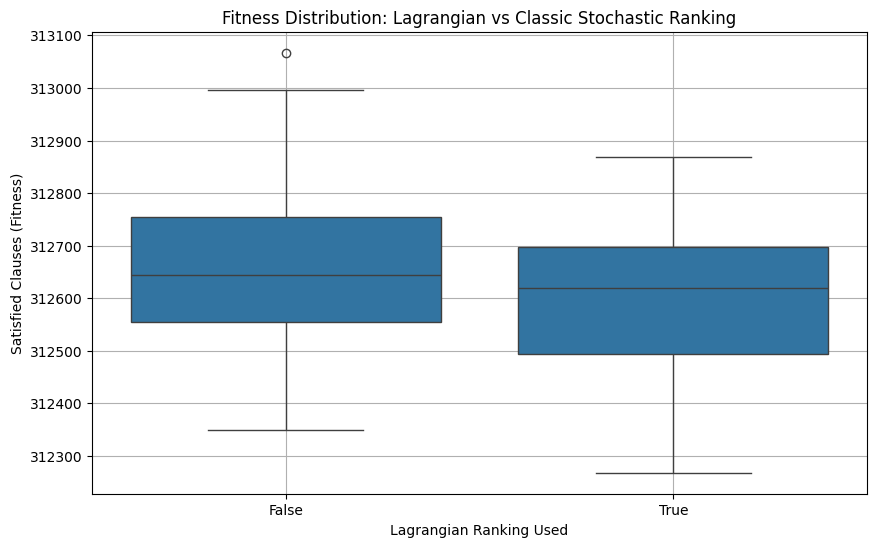

In [6]:
# ✅ Optional: Boxplot comparing Lagrangian vs Classic
plt.figure(figsize=(10, 6))
sns.boxplot(x='params_use_lagrangian', y='value', data=results_df)
plt.title('Fitness Distribution: Lagrangian vs Classic Stochastic Ranking')
plt.xlabel('Lagrangian Ranking Used')
plt.ylabel('Satisfied Clauses (Fitness)')
plt.grid(True)
plt.show()


In [19]:
optuna.get_all_study_summaries(storage=study._storage)

In [37]:
print(study.study_name)


no-name-9081aedd-d7ff-4b58-bcfb-80dd3a3a0b07


In [25]:

df = study.trials_dataframe()

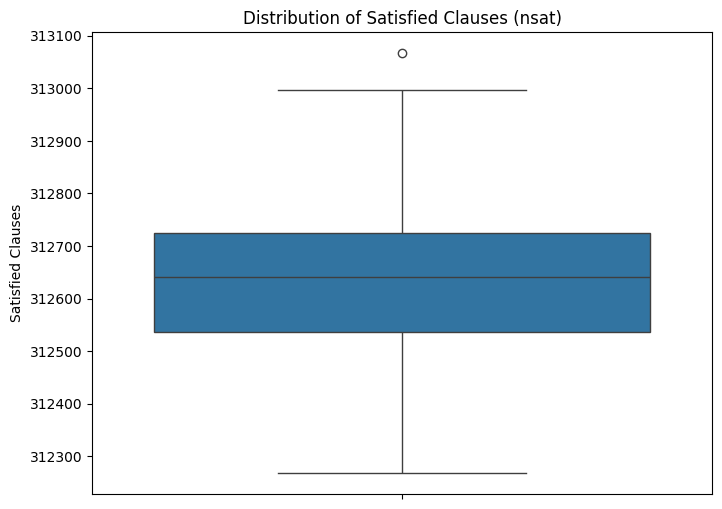

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='user_attrs_nsat')
plt.title('Distribution of Satisfied Clauses (nsat)')
plt.ylabel('Satisfied Clauses')
plt.show()


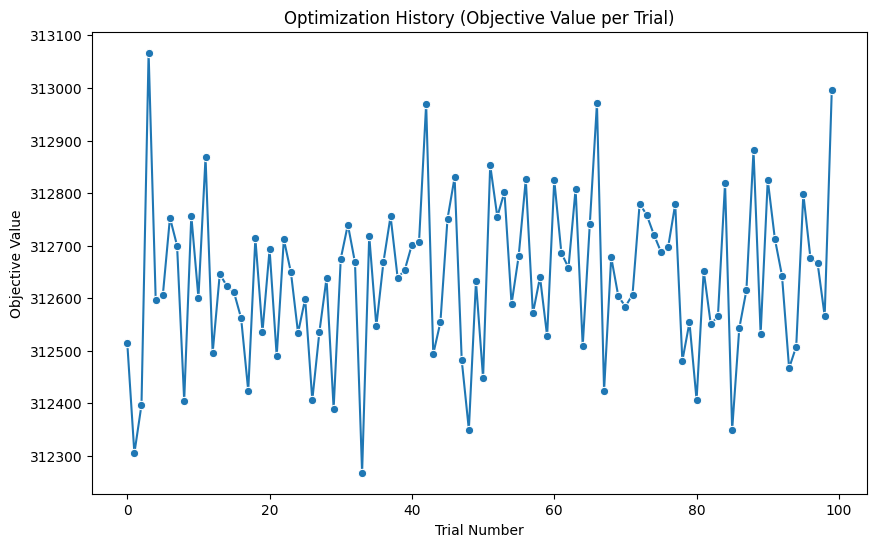

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='number', y='value', marker='o')
plt.title('Optimization History (Objective Value per Trial)')
plt.xlabel('Trial Number')
plt.ylabel('Objective Value')
plt.show()


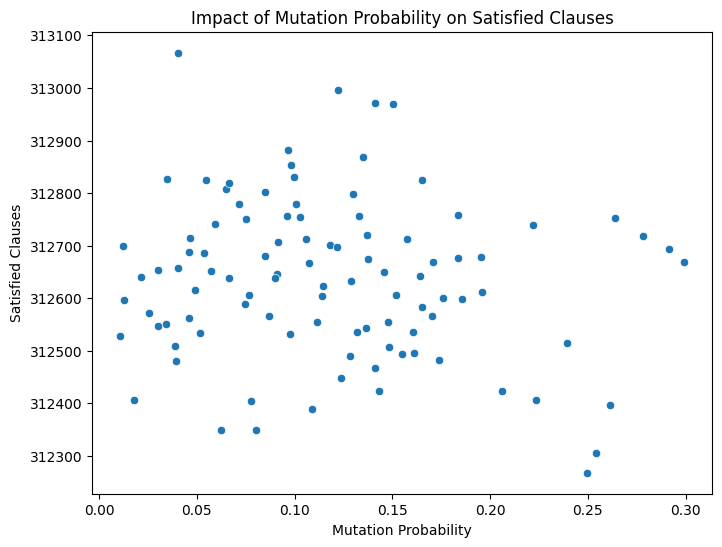

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='params_mutation_prob', y='user_attrs_nsat')
plt.title('Impact of Mutation Probability on Satisfied Clauses')
plt.xlabel('Mutation Probability')
plt.ylabel('Satisfied Clauses')
plt.show()


In [30]:
corr = df[['params_crossover_prob', 'params_mutation_prob', 
           'params_population_size', 'user_attrs_nsat']].corr()


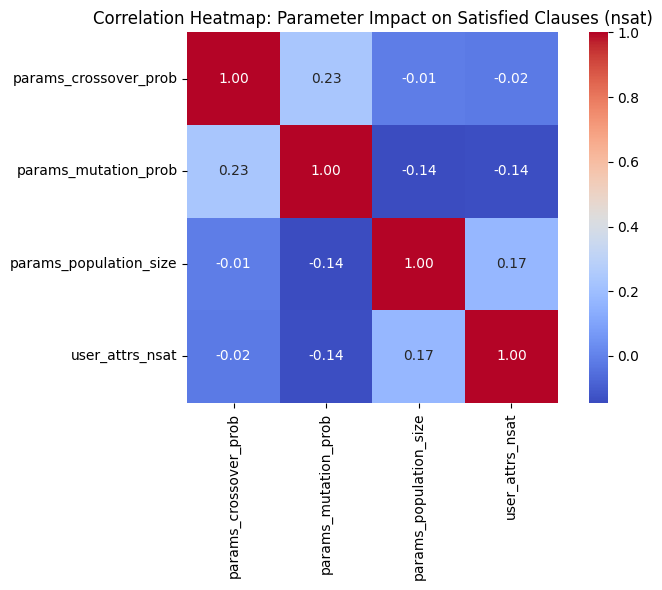

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('optuna_eda104_lagrangian_results.csv')

# Compute the correlation matrix for the tuning parameters and nsat
corr = df[['params_crossover_prob', 
           'params_mutation_prob', 
           'params_population_size', 
           'user_attrs_nsat']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, 
            annot=True,       # Show correlation values
            cmap='coolwarm',  # Color map
            fmt=".2f",        # Format float values
            square=True)

plt.title('Correlation Heatmap: Parameter Impact on Satisfied Clauses (nsat)', fontsize=12)
plt.tight_layout()
plt.show()


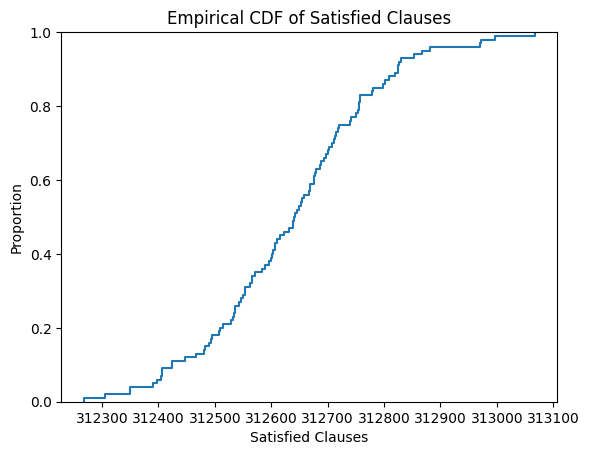

In [35]:
sns.ecdfplot(data=df, x='user_attrs_nsat')
plt.title('Empirical CDF of Satisfied Clauses')
plt.xlabel('Satisfied Clauses')
plt.show()


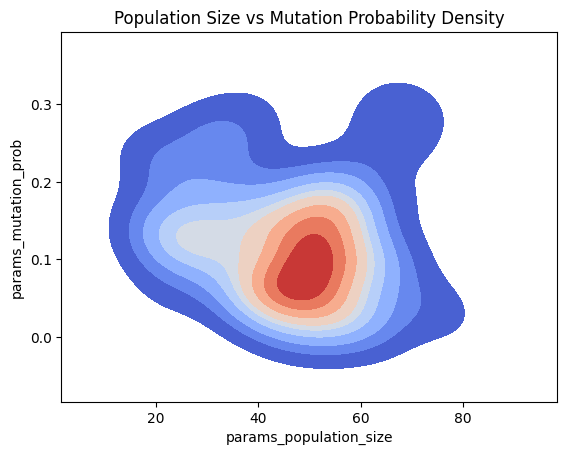

In [36]:
sns.kdeplot(
    data=df,
    x='params_population_size',
    y='params_mutation_prob',
    fill=True,
    cmap='coolwarm'
)
plt.title('Population Size vs Mutation Probability Density')
plt.show()


In [44]:
print(study.best_params)
print(study.best_value)
print(study.best_trial.user_attrs['t'])
print(study.best_trial.user_attrs['nsat'])
print(study.best_trial.user_attrs['xbest'])
print(study.best_trial.number)
print(study.study_name)

{'population_size': 38, 'crossover_prob': 0.8725026480911524, 'mutation_prob': 0.04031798079561371, 'use_lagrangian': False}
313067.0
1900
313067
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [133]:
def evaluate_individual_against_clauses(clauses, assignment):
    """
    Evaluates each clause against the assignment (bitstring).
    For each clause, prints the clause, the relevant assignment bits, and satisfaction.
    """
    results = []
    for idx, clause in enumerate(clauses):
        satisfied = 0
        relevant_bits = []
        for literal in clause:
            var_index = abs(literal) - 1  # Variable indices start at 1
            if var_index >= len(assignment):
                relevant_bits.append('X')  # Out of bounds (should not happen in correct usage)
                continue
            var_value = int(assignment[var_index])
            relevant_bits.append(str(var_value))
            if (literal > 0 and var_value == 1) or (literal < 0 and var_value == 0):
                satisfied = 1

        result = {
            "clause": " ".join(str(l) for l in clause),
            "assignment": "".join(relevant_bits),
            "satisfied": satisfied
        }
        results.append(result)

    
    return results

In [134]:
results = evaluate_individual_against_clauses(maxsat_instance.clauses, study.best_trial.user_attrs['xbest'])

In [136]:
results_df = pd.DataFrame(results)

results_df.head(10)

,clause,assignment,satisfied
0,-568,0,1
1,-569,0,1
2,-570,0,1
3,-571,0,1
4,-572,0,1
5,-573,0,1
6,-574,0,1
7,-575,0,1
8,-576,0,1
9,-577,0,1


In [137]:
pct = results_df['satisfied'].mean() * 100
print(f"Percentage of Satisfied Clauses: {pct:.2f}%")

Percentage of Satisfied Clauses: 87.04%
